# XOR #
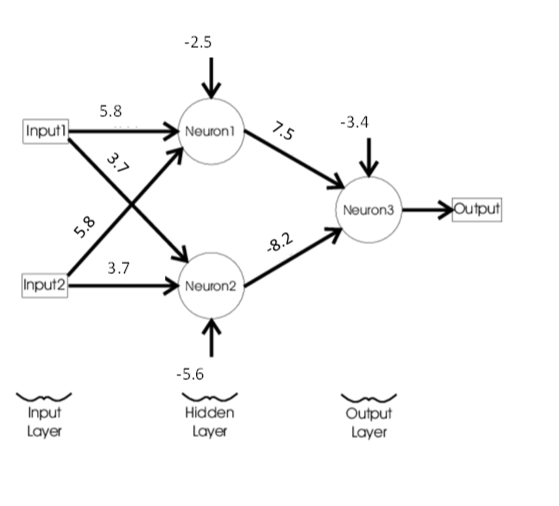
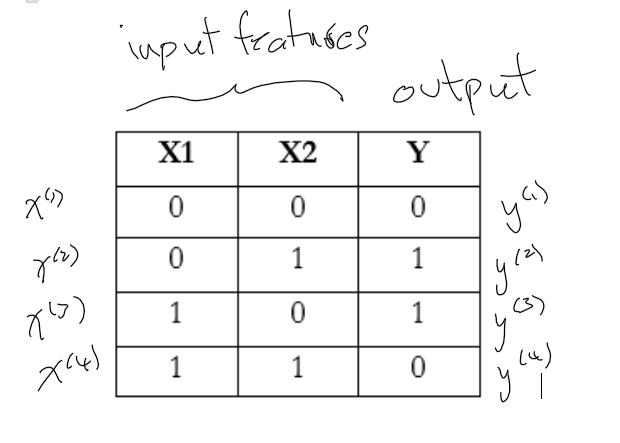

## Problem Statement ##
Write code to execute forward propagation to result i output, yhat = "A[2]" that should look something like this:
array([[0.05, 0.94, 0.942, 0.05]]), which is basically [0 1 1 0]. Refer to lecture slides for details.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [24]:
def relu(z):
    return (np.maximum(0,z))

In [25]:
def drelu(x):
    dr = (x > 0) * 1
    return dr

### Begin with constructing the vectors X, W1, W2, b, based on the given wightw and biases in diagrams above ###
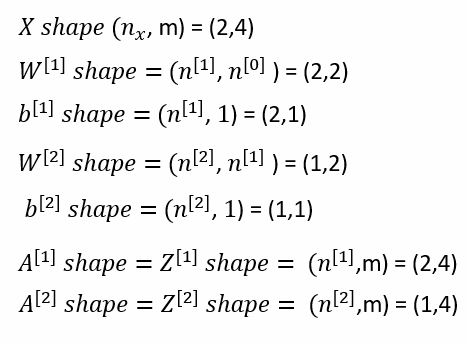

In [26]:
X1 = np.array([[0,0,1,1]])
X2 = np.array([[0,1,0,1]])
Y = np.array([[0,1,1,0]]) # (1,4)
W_l1 = np.array([[2.9,8.3],[-3,3]]) # (2,2)
W_l2 = np.array([[-1.2,6.4]]) # (1,2)
b_l1 = np.array([[8],[4]]) # (2,1)
b_l2 = np.array([[-2.1]]) # (1,1)
m = 4

In [27]:
X = np.block([[X1],[X2]]) # (nx,m)

In [28]:
epoch = 5000
alpha = .005

In [29]:
J = np.zeros((epoch,1))
for i in range(epoch):
    # Forward Prop
    Z_l1 = np.dot(W_l1,X) + b_l1
    A_l1 = sigmoid(Z_l1) #(2,4)
    Z_l2 = np.dot(W_l2,A_l1) + b_l2
    A_l2 = sigmoid(Z_l2) #(1,4)
    L = -(Y*np.log(A_l2) + (1-Y)*np.log(1-A_l2))
    J[i,0] = (1/m)*np.sum(L)
    # Back Prop
    dZ_l2 = A_l2 - Y
    dW_l2 = (1/m) * np.dot(dZ_l2,A_l1.T)
    db_l2 = (1/m) * np.sum(dZ_l2, axis = 1, keepdims = True)
    dZ_l1 = np.dot(W_l2.T,dZ_l2) * drelu(A_l1) 
    dW_l1 = (1/m) * np.dot(dZ_l1,X.T)
    db_l1 = (1/m) * np.sum(dZ_l1, axis = 1, keepdims = True)
    # Update Weights
    W_l2 = W_l2 - alpha * dW_l2
    b_l2 = b_l2 - alpha * db_l2
    W_l1 = W_l1 - alpha * dW_l1
    b_l1 = b_l1 - alpha * db_l1

The final cost value using Sigmoid is: J = 0.6931782576679404


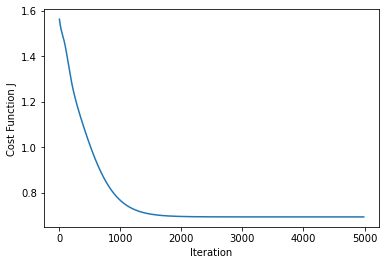

In [30]:
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')
print('The final cost value using Sigmoid is: J =', J[-1,0])

In [31]:
X1 = np.array([[0,0,1,1]])
X2 = np.array([[0,1,0,1]])
Y = np.array([[0,1,1,0]]) # (1,4)
W_l1 = np.array([[2.9,8.3],[-3,3]]) # (2,2)
W_l2 = np.array([[-1.2,6.4]]) # (1,2)
b_l1 = np.array([[8],[4]]) # (2,1)
b_l2 = np.array([[-2.1]]) # (1,1)
m = 4

In [32]:
J = np.zeros((epoch,1))
for i in range(epoch):
    # Forward Prop
    Z_l1 = np.dot(W_l1,X) + b_l1
    A_l1 = relu(Z_l1) #(2,4)
    Z_l2 = np.dot(W_l2,A_l1) + b_l2
    A_l2 = sigmoid(Z_l2) #(1,4)
    L = -(Y*np.log(A_l2) + (1-Y)*np.log(1-A_l2))
    J[i,0] = (1/m)*np.sum(L)
    # Back Prop
    dZ_l2 = A_l2 - Y
    dW_l2 = (1/m) * np.dot(dZ_l2,A_l1.T)
    db_l2 = (1/m) * np.sum(dZ_l2, axis = 1, keepdims = True)
    dZ_l1 = np.dot(W_l2.T,dZ_l2) * drelu(A_l1) 
    dW_l1 = (1/m) * np.dot(dZ_l1,X.T)
    db_l1 = (1/m) * np.sum(dZ_l1, axis = 1, keepdims = True)
    # Update Weights
    W_l2 = W_l2 - alpha * dW_l2
    b_l2 = b_l2 - alpha * db_l2
    W_l1 = W_l1 - alpha * dW_l1
    b_l1 = b_l1 - alpha * db_l1

The final cost value using Relu is: J = 0.6931471805599451


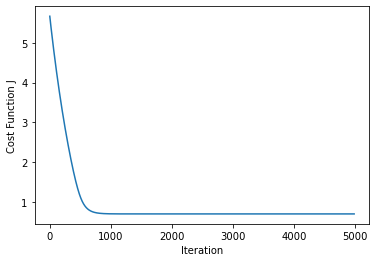

In [33]:
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')
print('The final cost value using Relu is: J =', J[-1,0])

### Based on the graphs above, using Relu in the hidden layer led to a quicker decrease in cost function. ###

### Keras ###

In [34]:
from keras.layers import Dense
from keras.models import Sequential
import keras
import tensorflow as tf 

In [35]:
X = X.T
Y = Y.T

In [36]:
n0 = 2
print(X)
print(Y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [37]:
model = Sequential()
model.add(Dense(units=2,activation='relu',input_dim=n0)) # hidden layer >2 nodes yields better results
model.add(Dense(units=8,activation='relu')) # add additional layer
model.add(Dense(units=1,activation='sigmoid'))

sgd=tf.keras.optimizers.SGD(learning_rate=.1)  # add tf in front
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
#print(model.get_weights())
history = model.fit(X,Y,epochs=600,batch_size=4,verbose=1)
#print(model.get_weights())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
4/4 [==============================] - 0s 92ms/step - loss: 0.7128 - accuracy: 0.5000
Epoch 2/600
4/4 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.5000
Epoch 3/600
4/4 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.5000
Epoch 4/600
4/4 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0

Yhat rounded =  [[0.]
 [1.]
 [0.]
 [0.]]


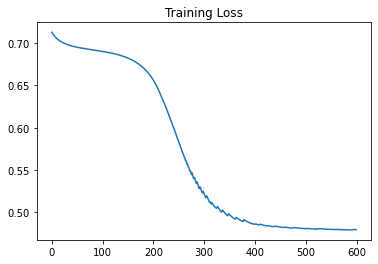

In [38]:
Yhat = model.predict(X)
print('Yhat rounded = ', np.rint(Yhat))
plt.plot(history.history['loss'])
plt.title('Training Loss');

In [39]:
Yhat

array([[0.3378096],
       [0.9911001],
       [0.3378096],
       [0.3378096]], dtype=float32)

In [40]:
# With the n0 nodes set to to, this was the results (above).
# Loss came down to 0.4771 with an accuracy of 75%. 
# Yhat converged to [0.333, 0.994, 0.336, 0.334]

In [41]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_dim=n0)) # hidden layer >2 nodes yields better results
model.add(Dense(units=8,activation='relu')) # add additional layer
model.add(Dense(units=1,activation='sigmoid'))

sgd=tf.keras.optimizers.SGD(learning_rate=.1)  # add tf in front
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
#print(model.get_weights())
history = model.fit(X,Y,epochs=600,batch_size=4,verbose=1)
#print(model.get_weights())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
4/4 [==============================] - 1s 159ms/step - loss: 0.7165 - accuracy: 0.5000
Epoch 2/600
4/4 [==============================] - 0s 1ms/step - loss: 0.7143 - accuracy: 0.2500
Epoch 3/600
4/4 [==============================] - 0s 752us/step - loss: 0.7114 - accuracy: 0.5000
Epoch 4/600
4/4 [==============================] - 0s 846us/step - loss: 0.7086 - accura

Yhat rounded =  [[0.]
 [1.]
 [1.]
 [0.]]


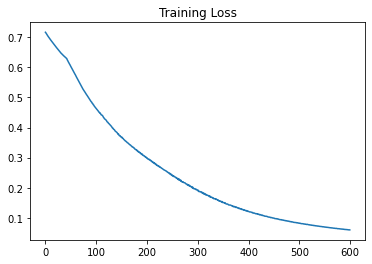

In [42]:
Yhat = model.predict(X)
print('Yhat rounded = ', np.rint(Yhat))
plt.plot(history.history['loss'])
plt.title('Training Loss');

In [43]:
# With n0 set to 4 nodes, 
# we saw much better results. 
# Loss of 0.06, accuracy of 100%, 
# and a Yhat the converged to nearly [0,1,1,0]